# Synthesized Evaluator MVP

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from synthesized import MetaExtractor
from synthesized.testing import TimeSeriesUtilityTesting
idx = pd.IndexSlice

Copyright (C) Synthesized Ltd. - All Rights Reserved
License key: EE6B-6720-67A2-32F3-32F3-2D31-322D-B531
Expires at: 2020-12-31 00:00:00


In [2]:
# df = pd.read_csv('~/synthesized/data/time-series/sandp500_5yr.csv')
# dp = MetaExtractor.extract(df, id_index='Name', time_index='date')
# dp.set_indices(df)
# stocks = [
#     'AMZN','GOOGL','FB','NFLX','ATVI','EA',
#     'AMGN','BIIB','GILD','BMY','JNJ','MRK','PFE','ILMN','TMO','WAT','BSX','ZBH',
#     'BA','LMT','AAL','DAL',
#     'NKE','TPR','DLTR','TGT',
#     'AMD','NVDA','INTC','STX','XRX','IBM','MSFT','ORCL','ADBE','CRM','GPN','ACN','MA','V',
# ]
# df.loc[idx[stocks, :], :].to_csv('~/synthesized/data/time-series/sandp_mini_5yr.csv')
df = pd.read_csv('~/synthesized/data/time-series/sandp_mini_5yr.csv')

dp = MetaExtractor.extract(df, id_index='Name', time_index='date')
dp.set_indices(df)
df = dp.time_value.make_index_periodic(df)
df_a = df.loc[idx[['AAL','GOOGL','LMT','MA','STX','TMO'], :], :]
df_b = df.loc[idx[['AMZN','BA','DAL','V','WAT','XRX'], :], :]

df_a.index = df_a.index.remove_unused_levels().set_levels(['A1','A2','A3','A4','A5','A6'], level=0)
df_b.index = df_b.index.remove_unused_levels().set_levels(['A2','A3','A1','A4','A6','A5'], level=0)
df_a = df_a.sort_index().reset_index()
df_b = df_b.sort_index().reset_index()

In [3]:
df_a

,Name,date,open,high,low,close,volume
0,A1,2013-02-08,15.07,15.120,14.6300,14.75,8407500.0
1,A1,2013-02-11,14.89,15.010,14.2600,14.46,8882000.0
2,A1,2013-02-12,14.45,14.510,14.1000,14.27,8126000.0
3,A1,2013-02-13,14.30,14.940,14.2500,14.66,10259500.0
4,A1,2013-02-14,14.94,14.960,13.1600,13.99,31879900.0
...,...,...,...,...,...,...,...
7819,A6,2018-02-01,224.16,226.440,219.6100,222.36,1912795.0
7820,A6,2018-02-02,220.11,220.775,217.5642,217.69,1992430.0
7821,A6,2018-02-05,216.71,219.255,207.8100,208.31,2387588.0
7822,A6,2018-02-06,205.00,211.100,201.6200,209.48,2415333.0


In [4]:
df_b

,Name,date,open,high,low,close,volume
0,A1,2013-02-08,14.77,14.880,14.52,14.62,9197133.0
1,A1,2013-02-11,14.66,14.900,14.61,14.69,7583776.0
2,A1,2013-02-12,14.64,14.790,14.46,14.50,7146775.0
3,A1,2013-02-13,14.57,14.800,14.50,14.78,7230362.0
4,A1,2013-02-14,14.60,14.680,14.02,14.24,17917839.0
...,...,...,...,...,...,...,...
7819,A6,2018-02-01,214.16,218.660,213.52,217.37,453178.0
7820,A6,2018-02-02,215.88,217.410,212.26,212.49,642724.0
7821,A6,2018-02-05,211.61,212.640,202.89,203.26,667076.0
7822,A6,2018-02-06,200.39,204.420,197.82,202.72,852734.0


In [5]:
df_meta = MetaExtractor.extract(df_a, id_index='Name', time_index='date')

tsu = TimeSeriesUtilityTesting(
    df_meta=df_meta, df_orig=df_a, df_synth=df_b, forecast_from='2015-01-01'
)

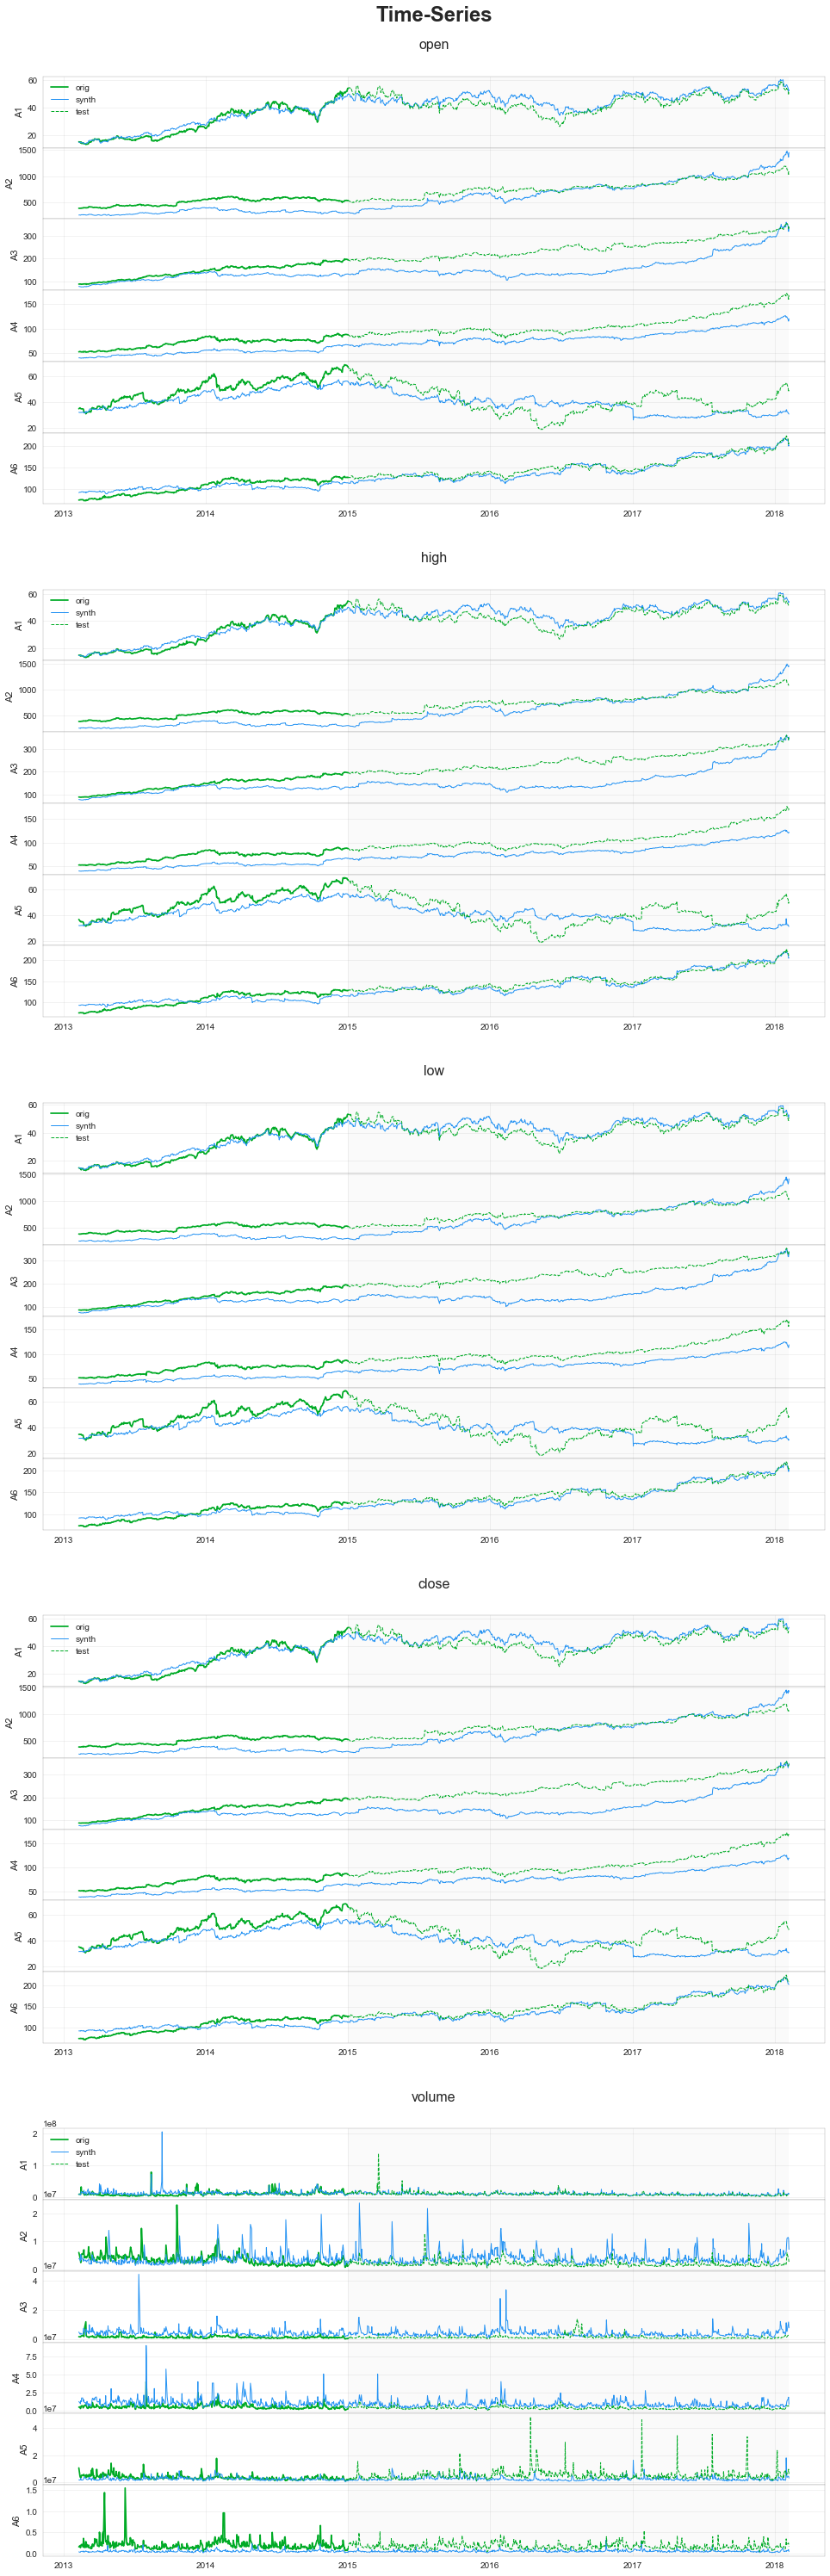

In [6]:
tsu.show_series()

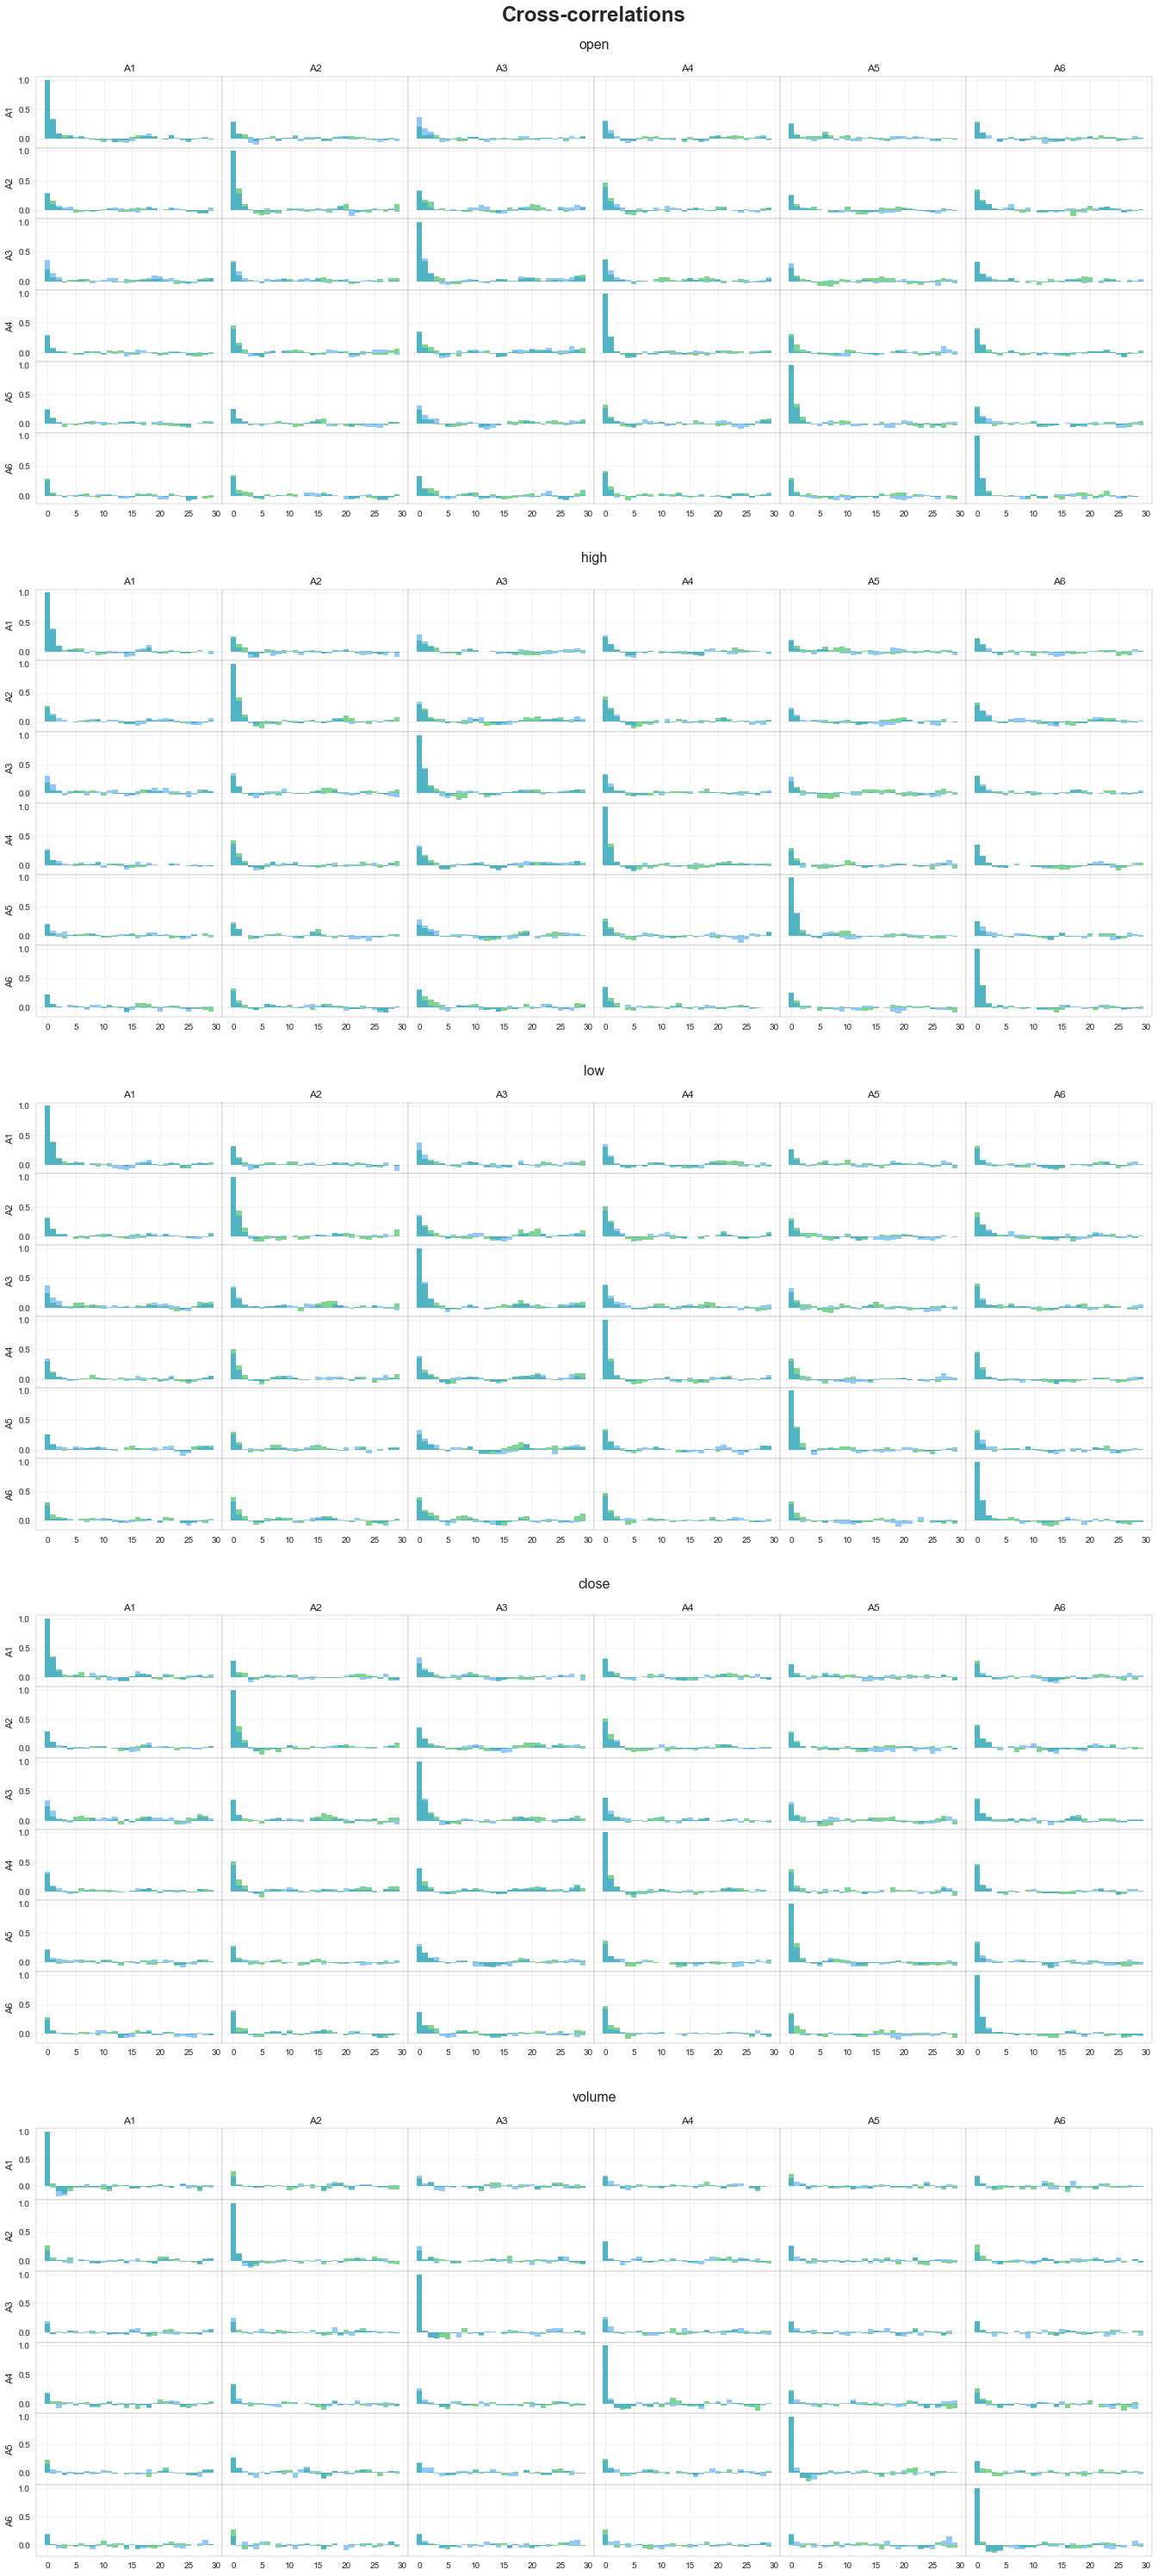

In [7]:
tsu.show_auto_associations()